In [59]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

## Importing and Reading the necessary Files
The dataset is split into training data and testing data.
Rows with null values are not dropped due to the significant number of missing values in the dataset. Dropping null cells will result from the count dropping from 891 to 183 row. This is a substantial loss of data (~80%), which could lead to biased or unreliable machine learning models. I

In [55]:
train_file_path = "train.csv"
train_data = pd.read_csv(train_file_path)
print(train_data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [56]:
test_file_path = "test.csv"
test_data = pd.read_csv(test_file_path)
print(test_data.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


## Generate a correlation Heatmap. 
Yellow means negatively correlated and Blue is positively Correlated.
This revealed that Passenger Class, Sex are highly negatively correlated and Fare are highly correlated to the "Survived" result, this is vital. It also shows thet Sibling Count, Age and Parch have a slight correlation to the result


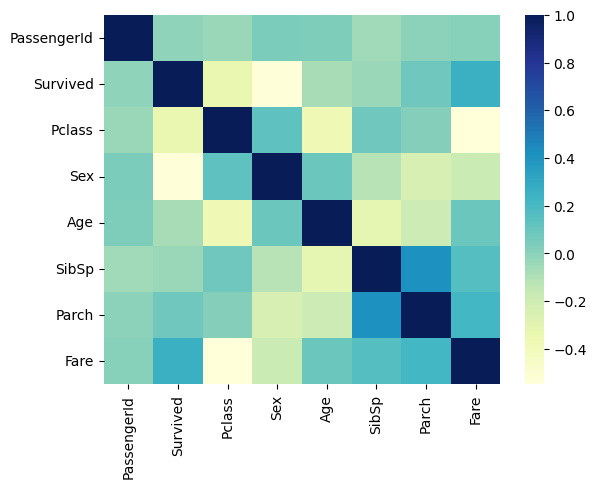

In [64]:
import seaborn as sns
sns.heatmap(train_data.corr(numeric_only = True), cmap="YlGnBu")
plt.show()

In [77]:
label_encoder = LabelEncoder()
#Encoding is necessary here to transform "Sex" from text based data to numerical, as the RandomForestClassifier only accepts numerical
features = ['Pclass','Sex','Age','Fare','SibSp','Parch']
train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])
test_data['Sex'] = label_encoder.fit_transform(test_data['Sex'])


In [80]:
train_X = train_data[features]
train_y=train_data['Survived']

test_X = test_data[features]
#RandomForestClassifier is chosen instead of RandomForestRegressor to uses provide discrete result instead of analog representation as the resulting survivability is either 0 or 1
#Random state of one ensures that the prediction result will be consistent no matter now many times it is run
train_model = RandomForestClassifier(random_state = 1)
train_model.fit(train_X, train_y)


RandomForestClassifier(random_state=1)

In [79]:
train_prediction = train_model.predict(train_X)

print("Making predictions for the following 5 passengers")
print(train_data.head())
print("The predictions are")
print(train_model.predict(train_X.head()))
print("The mean absoulte error is:")
print(mean_absolute_error(train_y, train_prediction))

Making predictions for the following 5 passengers
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373

In [72]:
test_prediction = train_model.predict(test_X)
print(train_model.predict(test_X.head()))

[0 0 1 1 0]


In [73]:
submission = test_data[["PassengerId"]]
submission

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [74]:
submission["Survived"] = test_prediction

C:\Users\User\AppData\Local\Temp\ipykernel_22112\1847208739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission["Survived"] = test_prediction


In [75]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [76]:
submission.to_csv("submission.csv", index=None)